## E-commerce project
### Стрельцова Екатерина

In [115]:
#сначала импортируем все нужные библиотеки

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np

In [3]:
# читаем файлы с данными и записываем их в переменные
customers_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-streltsova-31/files for project/olist_customers_dataset.csv')
order_items_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-streltsova-31/files for project/olist_order_items_dataset.csv')
orders_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-streltsova-31/files for project/olist_orders_dataset.csv')

# 1 вопрос
### Сколько у нас пользователей, которые совершили покупку только один раз? 

In [4]:
customers_dataset.head() 
# таблица содержит информацию о номерах айди заказов и пользователях с их 
# персональными данными - номер айди, почтовый индекс, город, штат

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers_dataset.isna().sum() # проверяем данные на наличие пропусков

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
customers_dataset.shape #99441 заказов было сделано 

(99441, 5)

In [7]:
customers_dataset.customer_unique_id.nunique() 
#таким образом в таблице содержатся данные о 96096 уникальных пользователях, 
#нужно теперь узнать, кто из них делал заказ единожды, и заказ был успешен


96096

In [8]:
orders_dataset.head() 
# датасет содержит информацию о заказазах, их также 99441, как 
# и customer_id и order_id. Поэтому нужно найти уникальных.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
#добавим уникальный айди пользователя в таблицу о заказах с помощью джоин
orders_dataset_merged = orders_dataset.merge(customers_dataset, how = 'left', on = 'customer_id')

In [10]:
#чтобы узнать, кто совершил заказ, возьмем только заказы со статусом доставлено
unique_customers_1order = orders_dataset_merged.query('order_status == "delivered"')

In [11]:
# проверим, нет ли тут ошибок в данных. Посмотрим на пропуски
unique_customers_1order.isna().sum()
# даты доставки нет у 8 заказов. Значит, здесь или ошибочный статус или заказ все-таки не был доставлен.

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [12]:
# Удалим эти строки
unique_customers_1order = unique_customers_1order.dropna(subset=['order_delivered_customer_date'])

In [13]:
# группируем по уникальным айди и считаем кол-во заказов на уникальный айди. Снова фильтруем по кол-ву заказов.
unique_customers_1order = unique_customers_1order.groupby('customer_unique_id', as_index = False).agg({'order_id':'count'}).rename(columns = {'order_id':'number_of_orders'}).query('number_of_orders == 1')

In [14]:
unique_customers_1order


,customer_unique_id,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,1
93346,fffea47cd6d3cc0a88bd621562a9d061,1
93347,ffff371b4d645b6ecea244b27531430a,1
93348,ffff5962728ec6157033ef9805bacc48,1


### Кол-во уникальных пользователей, совершивших покупку один раз - 90549 - ответ на первый вопрос

# 2 вопрос
### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)

In [16]:
orders_dataset.shape

(99441, 8)

In [17]:
orders_dataset.order_status.value_counts() #выгружаем все уникальные статусы.

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [18]:
orders_dataset.isna().sum() #проверяем данные на наличие пропусков. Пропуски в данных по времени доставки и подтверждения заказов.


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

 Таким образом получается, что за все время было не подтверждено 160 заказов после их получения.
 
 Еще 1623(1783-160) не было передано в курьерскую службу по каким-то причинам
 
 И после этого 1022 не было доставлено покупателю службой доставки. 
 
 Посмотрим, есть ли ошибки в статусах

In [19]:
# Из первого вопроса мы знаем, что есть ошибки в строках со статусом delivered.Удаляем их
orders_dataset_del = orders_dataset.query('order_status == "delivered"')
orders_dataset_del= orders_dataset_del.dropna(subset=['order_delivered_customer_date'])

In [21]:
orders_dataset.query('order_status == "shipped"').isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64

здесь все кажется правильным. 1107 заказов не доставлено службой доставки по какой-то причине. 

In [23]:
orders_dataset.query ('order_status == "canceled"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

625 заказов со статусом отменен  
141 заказ был не подтвержден  
409 заказов было отменено после передачи заказа курьеской службе  
6 заказов имеют статус отменены, хотя есть дата доставки. Будем считать, что это возвраты

In [25]:
orders_dataset.query('order_status == "unavailable"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

здесь картина кажется странной, заказ подтвержден, но в итоге недоступен. Я так понимаю, что обнаружили при сборке, что нет в наличии. Возможно, проблема в системе.

In [27]:
orders_dataset.query('order_status == "invoiced"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

314 заказов не оплачено, соотвественно не было передано в доставку

In [28]:
orders_dataset.query('order_status == "processing"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

301 заказ остался в процессе сборки

In [29]:
orders_dataset.query('order_status == "created"').isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
dtype: int64

5 заказов так и не было подтверждено

In [30]:
orders_dataset.query('order_status == "approved"').isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    2
order_estimated_delivery_date    0
dtype: int64

2 заказа остались в статусе подтвержденных, но по какой-то причине не было дальнейшего продвижения по ним. 

In [31]:
# теперь создаем датасет за минусом тех строк, которые мы удалили в статусе delivered
orders_dataset1 = orders_dataset.query('order_status != "delivered"')
orders_dataset1 = orders_dataset1.append(orders_dataset_del, sort = False)

In [32]:
# переведем дату получения заказа к началу месяца, чтобы посмотреть статистику заказов по месяцам
orders_dataset1['order_purchase_timestamp'] = pd.to_datetime(orders_dataset1['order_purchase_timestamp']).dt.to_period('M').dt.to_timestamp()

In [34]:
# посмотрим общее кол-во заказов по месяцам для общего понимания
orders_dataset_all = orders_dataset1.groupby('order_purchase_timestamp', as_index = False).agg({'order_id':'count'}).sort_values('order_purchase_timestamp').rename(columns = {'order_id':'number_of_orders'})

в 2016 году были перебои с заказами, в ноября их не было вовсе,в сентябре 2018 кол-во заказов также резко снизилось

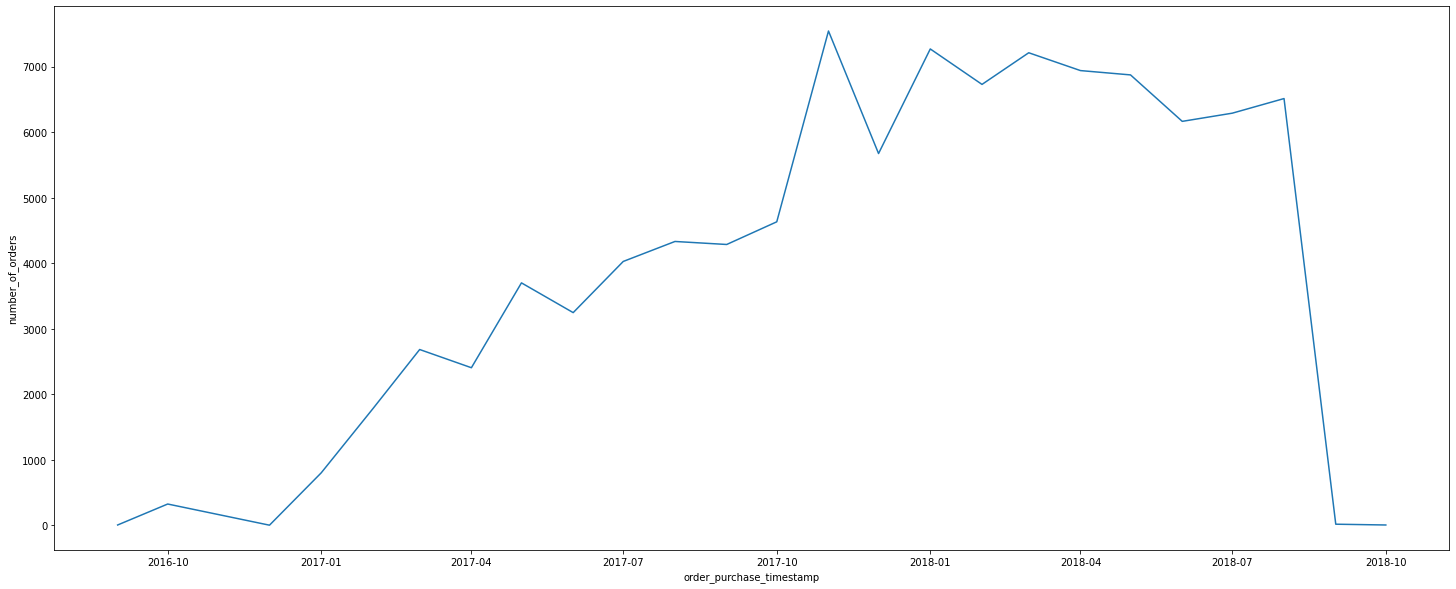

In [35]:
plt.figure(figsize = (25,10))
sns.lineplot(x = orders_dataset_all['order_purchase_timestamp'], y = orders_dataset_all['number_of_orders'])

In [36]:
# теперь посмотрим на кол-во не доставленных заказов с причинами по месяцам
orders_not_delivered = orders_dataset1.query('order_status != "delivered"').groupby(['order_purchase_timestamp', 'order_status'], as_index = False).agg({'order_id':'count'}).sort_values('order_purchase_timestamp').rename(columns = {'order_id':'number_of_orders'})

In [37]:
#сделаем сводную, чтобы было удобнее
orders_not_delivered_piv = orders_not_delivered.pivot(index = 'order_purchase_timestamp', columns = 'order_status', values = 'number_of_orders').fillna(0)

In [38]:
orders_not_delivered_piv

order_status,approved,canceled,created,invoiced,processing,shipped,unavailable
order_purchase_timestamp,,,,,,,
2016-09-01,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2016-10-01,0.0,24.0,0.0,18.0,2.0,8.0,7.0
2017-01-01,0.0,3.0,0.0,12.0,9.0,16.0,10.0
2017-02-01,1.0,17.0,0.0,11.0,32.0,21.0,45.0
2017-03-01,0.0,33.0,0.0,3.0,23.0,45.0,32.0
2017-04-01,1.0,18.0,0.0,14.0,10.0,49.0,9.0
2017-05-01,0.0,29.0,0.0,16.0,23.0,55.0,31.0
2017-06-01,0.0,16.0,0.0,11.0,12.0,47.0,24.0
2017-07-01,0.0,28.0,0.0,7.0,11.0,56.0,52.0


[Text(0, 0, '2016-09-01T00:00:00.000000000'),
 Text(0, 0, '2016-10-01T00:00:00.000000000'),
 Text(0, 0, '2017-01-01T00:00:00.000000000'),
 Text(0, 0, '2017-02-01T00:00:00.000000000'),
 Text(0, 0, '2017-03-01T00:00:00.000000000'),
 Text(0, 0, '2017-04-01T00:00:00.000000000'),
 Text(0, 0, '2017-05-01T00:00:00.000000000'),
 Text(0, 0, '2017-06-01T00:00:00.000000000'),
 Text(0, 0, '2017-07-01T00:00:00.000000000'),
 Text(0, 0, '2017-08-01T00:00:00.000000000'),
 Text(0, 0, '2017-09-01T00:00:00.000000000'),
 Text(0, 0, '2017-10-01T00:00:00.000000000'),
 Text(0, 0, '2017-11-01T00:00:00.000000000'),
 Text(0, 0, '2017-12-01T00:00:00.000000000'),
 Text(0, 0, '2018-01-01T00:00:00.000000000'),
 Text(0, 0, '2018-02-01T00:00:00.000000000'),
 Text(0, 0, '2018-03-01T00:00:00.000000000'),
 Text(0, 0, '2018-04-01T00:00:00.000000000'),
 Text(0, 0, '2018-05-01T00:00:00.000000000'),
 Text(0, 0, '2018-06-01T00:00:00.000000000'),
 Text(0, 0, '2018-07-01T00:00:00.000000000'),
 Text(0, 0, '2018-08-01T00:00:00.0

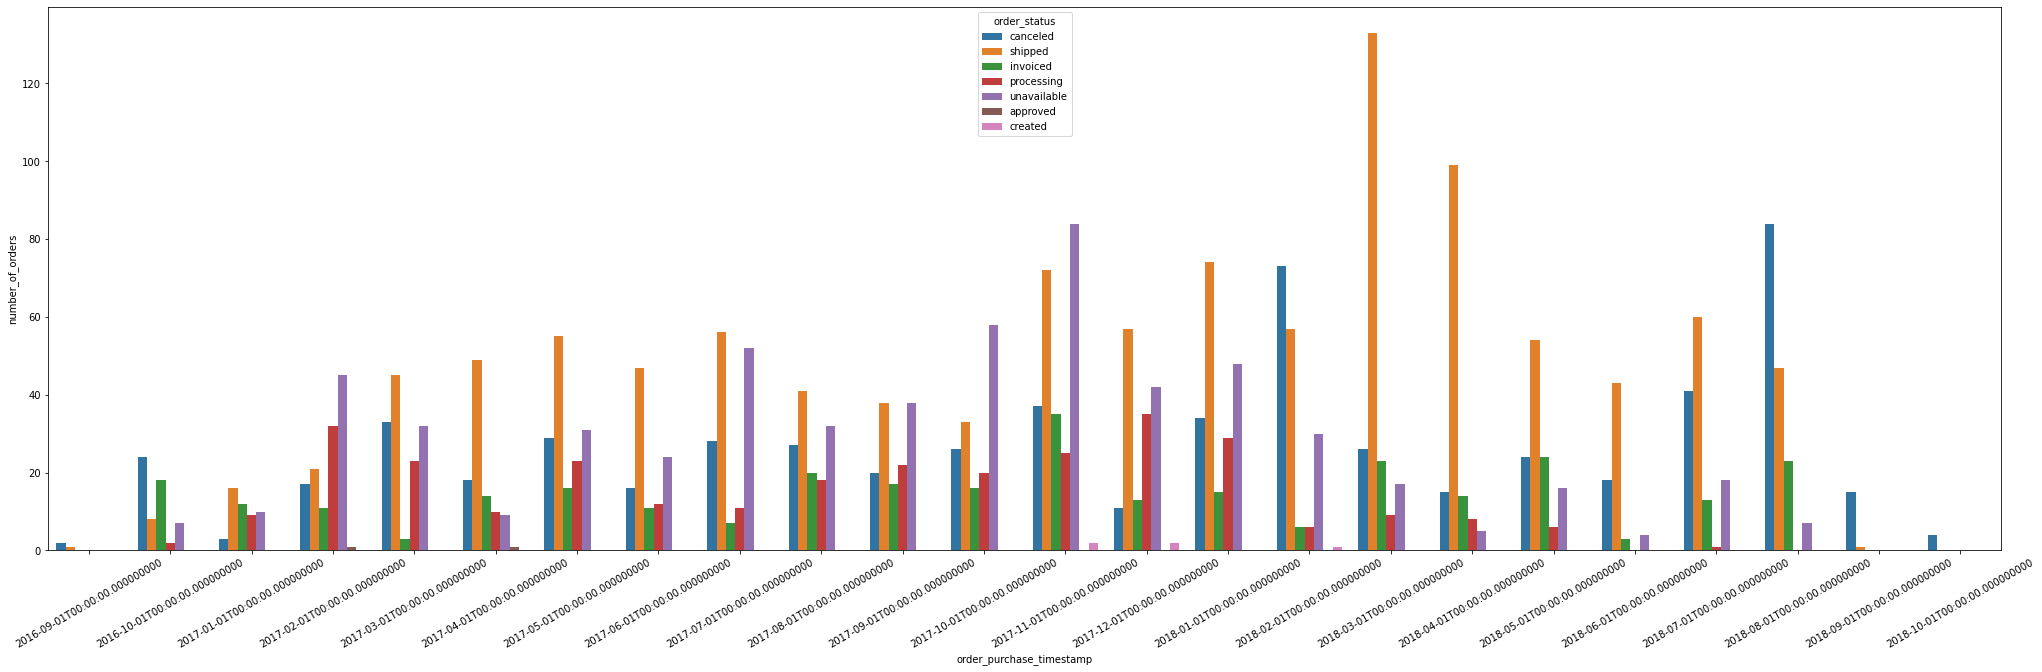

In [39]:
#построим график для наглядности: кол-во не завершенных заказов с причинами по месяцам
plt.figure(figsize = (35,10))
ax = sns.barplot(data=orders_not_delivered, x='order_purchase_timestamp', y='number_of_orders', hue = 'order_status')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [40]:
# теперь посмотрим сколько заказов в месяц не доставляется в среднем по разным причинам.
# Уберу из выборки 2016 год и два последних месяца 2018 года, т.к. кол-во заказов в них очень мало
orders_dataset_new = orders_dataset1.query("order_purchase_timestamp > '2016-12-01' and order_purchase_timestamp < '2018-09-01'")

In [41]:
orders_dataset_new.query('order_status != "delivered"').groupby(['order_purchase_timestamp', 'order_status'], as_index = False).agg({'order_id':'count'}).rename(columns = {'order_id':'number_of_orders'}).groupby('order_status', as_index = False).agg({'number_of_orders':'mean'}).rename(columns = {'number_of_orders':'mean_by_reason'}).sort_values('mean_by_reason')

,order_status,mean_by_reason
0,approved,1.000000
2,created,1.666667
3,invoiced,14.800000
4,processing,16.611111
1,canceled,29.000000
6,unavailable,30.100000
5,shipped,54.850000


## Ответ на 2 вопрос
В среднем в месяц кол-во незавершенных заказов в детализации по причинам такие: (данные округлены до целых чисел)  
55 - заказов не доставлено службой доставки по какой-то причине(кража, бой, покупатель не принял заказ)  
30 - заказ недоступен, как мы выяснили выше, уже после подтверждения. Возможно, физически товар отсутствовал  
29 - отменен  
17 - заказ остался в процессе сборки (тоже возможно, что что-то пошло не так, испортили при сборке или не нашли товар)  
15 - заказов не было оплачено после выставления счета  
2 - заказа не потверждено после создания  

# 3 вопрос
### По каждому товару определить, в какой день недели товар чаще всего покупается.

In [43]:
#создаем датафрейм с датой заказа по его номеру

date_of_orders = orders_dataset[['order_id','order_purchase_timestamp']]
order_items_dataset_w_date = order_items_dataset.merge(date_of_orders, how = 'left', on = 'order_id')

In [44]:
# переводим дату в день недели
order_items_dataset_w_date['order_purchase_timestamp'] = pd.to_datetime(order_items_dataset_w_date['order_purchase_timestamp']).dt.weekday

In [45]:
products_by_date = order_items_dataset_w_date.groupby(['product_id', 'order_purchase_timestamp'], as_index = False).agg({'order_item_id':'count'})

In [46]:
products_by_date.groupby('product_id', as_index = False).agg

,product_id,order_purchase_timestamp,order_item_id
0,00066f42aeeb9f3007548bb9d3f33c38,6,1
1,00088930e925c41fd95ebfe695fd2655,1,1
2,0009406fd7479715e4bef61dd91f2462,3,1
3,000b8f95fcb9e0096488278317764d19,2,1
4,000b8f95fcb9e0096488278317764d19,4,1
...,...,...,...
61225,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2
61226,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1
61227,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1
61228,fffdb2d0ec8d6a61f0a0a0db3f25b441,6,1


In [63]:
# делаем сводную таблицу с распределением покупок каждого товара в зависимости от дня недели
# 0 - понедельник - 6 - воскресенье
products_by_date_piv = products_by_date.pivot(index = 'product_id', columns = 'order_purchase_timestamp', values = 'order_item_id').fillna(0)

In [76]:
products_by_date_piv = products_by_date_piv.rename(columns = {0:'Пн', 1:'Вт', 2:'Ср', 3:'Чт', 4:'Пт', 5:'Cб', 6:'Вс'})
products_by_date_piv

order_purchase_timestamp,Пн,Вт,Ср,Чт,Пт,Cб,Вс
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,0.0,0.0,0.0,1.0
00088930e925c41fd95ebfe695fd2655,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,1.0,0.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,0.0,0.0,1.0,0.0,1.0,0.0,0.0
000d9be29b5207b54e86aa1b1ac54872,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,0.0,0.0,0.0,1.0,1.0
fff81cc3158d2725c0655ab9ba0f712c,1.0,0.0,0.0,0.0,0.0,0.0,0.0
fff9553ac224cec9d15d49f5a263411f,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Таблица выше представляет собой данныt по кол-ву покупок того или иного товара в зависимости от дня недели

In [77]:
products_by_date_piv1 = products_by_date_piv.T

In [84]:
items_by_day = products_by_date_piv1.idxmax()
items_by_day = pd.DataFrame(data = items_by_day, columns = ['day_of_week']).reset_index()
items_by_day

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Вс
1,00088930e925c41fd95ebfe695fd2655,Вт
2,0009406fd7479715e4bef61dd91f2462,Чт
3,000b8f95fcb9e0096488278317764d19,Ср
4,000d9be29b5207b54e86aa1b1ac54872,Вт
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Cб
32947,fff81cc3158d2725c0655ab9ba0f712c,Пн
32948,fff9553ac224cec9d15d49f5a263411f,Пт
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Вт


## Ответ на 3 вопрос
### в датафрейме выше указаны дни недели, когда тот или иной товар покупался большее кол-во раз

In [89]:
items_by_day.day_of_week.value_counts()
# в Пн покупалось наибольшее кол-во товаров и постепенно снижалось к выходным

Пн    6982
Вт    6054
Ср    5393
Чт    4559
Пт    4089
Вс    3010
Cб    2864
Name: day_of_week, dtype: int64

# 4 вопрос
### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [91]:
# переведем дату получения заказа к началу месяца, чтобы посмотреть статистику заказов по месяцам
orders_dataset_merged['Month'] = pd.to_datetime(orders_dataset_merged['order_purchase_timestamp']).dt.to_period('M').dt.to_timestamp()

In [93]:
#считаем кол-во заказов каждого пользователя в месяц
orders_by_customer_in_month = orders_dataset_merged.groupby(['customer_unique_id', 'Month'], as_index = False).agg({'order_id':'count'}).sort_values('order_id',ascending = False).rename(columns = {'order_id':'number_of_orders'})

In [94]:
#добавляем кол-во недель в месяце, когда был сделан заказ
orders_by_customer_in_month['number_of_weeks'] = orders_by_customer_in_month['Month'].dt.daysinmonth/7

In [95]:
#считаем сколько в среднем в неделю в конкретный месяц было сделано заказов каждым из пользователя
orders_by_customer_in_month['mean_in_week_by_month'] = orders_by_customer_in_month.number_of_orders/orders_by_customer_in_month.number_of_weeks

In [96]:
# теперь считаем среднее кол-во заказов в неделю по каждому клиенту по месяцам (т.е. в те месяца, когда у клиента были заказы, среднее кол-во заказов в неделю в месяц было таким)
orders_by_customer_in_month.groupby('customer_unique_id', as_index = False).agg({'mean_in_week_by_month':'mean'}).sort_values('mean_in_week_by_month', ascending = False)

,customer_unique_id,mean_in_week_by_month
7175,12f5d6e1cbf93dafd9dcc19095df0b3d,1.354839
60942,a239b8e2fbce33780f1f1912e2ee5275,1.000000
14199,25a560b9a6006157838aab1bdbd68624,0.933333
66396,b08fab27d47a1eb6deda07bfd965ad43,0.933333
75269,c8460e4251689ba205045f3ea17884a1,0.903226
...,...,...
40294,6b0f5e8ef1a126f8a31ab5bec4f48ab7,0.225806
40295,6b0fc5b03e761d5203e1441fbaf34d11,0.225806
40296,6b102c363647e94b0c8fc664a6dbdf42,0.225806
40297,6b10488724fdd3b732b505d771b2da78,0.225806


## Ответ на 4 вопрос
В таблице выше - среднее кол-во заказов в неделю по каждому клиенту по месяцам (в те месяца, когда у клиента были заказы)

# 3 вопрос
### Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

In [102]:
orders_dataset_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Month_x,Month_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,2017-09-01
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-01,2017-09-01
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01,2018-07-01
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01,2018-08-01
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,2017-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-01,2017-03-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-01,2018-02-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-01,2017-08-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-01,2018-01-01


In [103]:
#группируем клиентов по дате первой покупки
first_order = orders_dataset_merged.groupby(['customer_unique_id'], as_index = False).agg({'Month_x':'min'}).rename (columns = {'Month_x':'first_order'})

In [104]:
#добавляем эту информацию в датасет

orders_dataset_merged = orders_dataset_merged.merge(first_order, how = 'inner', on = 'customer_unique_id')

In [105]:
#оставляем только те данные, соответсвующие первому заказу с января по декабрь 2017
orders_dataset_merged = orders_dataset_merged.query('first_order > "2016-12-01" and first_order < "2018-01-01"')

In [106]:
orders_dataset_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Month_x,Month_y,first_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,2017-09-01,2017-09-01
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-01,2017-09-01,2017-09-01
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,2017-11-01,2017-11-01
6,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07-01,2017-07-01,2017-07-01
7,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04-01,2017-04-01,2017-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,2017-10-01,2017-10-01,2017-10-01
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG,2017-01-01,2017-01-01,2017-01-01
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,2017-02-01,2017-02-01,2017-02-01
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-01,2017-03-01,2017-03-01


In [107]:
cogort = orders_dataset_merged.groupby(['first_order','Month_x'], as_index = False).agg({'order_id':'count'}).rename(columns = {'order_id':'number_of_orders'})

In [108]:
#получаем распределение заказов по месяцам внутри когорт
cogort.pivot(index = 'first_order', columns = 'Month_x', values = 'number_of_orders')

Month_x,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01
first_order,,,,,,,,,,,,,,,,,,,,
2017-01-01,799.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,NaN,1.0
2017-02-01,NaN,1777.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,5.0,NaN
2017-03-01,NaN,NaN,2676.0,14.0,10.0,12.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04-01,NaN,NaN,NaN,2383.0,15.0,6.0,5.0,8.0,6.0,9.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,6.0
2017-05-01,NaN,NaN,NaN,NaN,3670.0,19.0,21.0,14.0,11.0,14.0,17.0,6.0,9.0,13.0,9.0,12.0,10.0,1.0,8.0,11.0
2017-06-01,NaN,NaN,NaN,NaN,NaN,3200.0,15.0,12.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,7.0
2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,3969.0,22.0,14.0,10.0,13.0,8.0,12.0,4.0,8.0,11.0,9.0,13.0,5.0,10.0
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4266.0,30.0,16.0,11.0,15.0,24.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202.0,28.0,22.0,16.0,19.0,13.0,9.0,10.0,12.0,7.0,11.0,3.0


In [109]:
# добавим колонку с кол-вом заказов в первый месяц по когорте, можем взять по функуии мах, т.к. видно в данных выше, что в первый месяц заказов больше чем в последующие
first_num_of_orders = cogort.groupby('first_order', as_index = False).agg({'number_of_orders':'max'})
cogort = cogort.merge(first_num_of_orders, how = 'inner', on = 'first_order')

In [111]:
cogort = cogort.rename(columns = {'number_of_orders_y':'first_num_of_orders', 'number_of_orders_x':'number_of_orders', 'Month_x':'Month_of_order'})

In [112]:
cogort

,first_order,Month_of_order,number_of_orders,first_num_of_orders
0,2017-01-01,2017-01-01,799,799
1,2017-01-01,2017-02-01,3,799
2,2017-01-01,2017-03-01,2,799
3,2017-01-01,2017-04-01,1,799
4,2017-01-01,2017-05-01,3,799
...,...,...,...,...
166,2017-12-01,2018-04-01,15,5551
167,2017-12-01,2018-05-01,11,5551
168,2017-12-01,2018-06-01,9,5551
169,2017-12-01,2018-07-01,3,5551


In [113]:
# добавляем колонку retention
cogort['retention'] = (cogort.number_of_orders/cogort.first_num_of_orders).apply(lambda x: format(x, '.2%'))

In [114]:
cogort.pivot(index = 'first_order', columns = 'Month_of_order', values = 'retention')


Month_of_order,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01
first_order,,,,,,,,,,,,,,,,,,,,
2017-01-01,100.00%,0.38%,0.25%,0.13%,0.38%,0.13%,0.50%,0.13%,0.13%,NaN,0.38%,0.13%,0.75%,0.38%,0.13%,0.13%,0.25%,0.38%,NaN,0.13%
2017-02-01,NaN,100.00%,0.23%,0.28%,0.11%,0.39%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,0.28%,0.17%,0.17%,0.11%,0.06%,0.06%,0.28%,NaN
2017-03-01,NaN,NaN,100.00%,0.52%,0.37%,0.45%,0.34%,0.15%,0.15%,0.30%,0.34%,0.07%,0.37%,0.15%,0.22%,0.11%,0.15%,0.22%,0.07%,0.15%
2017-04-01,NaN,NaN,NaN,100.00%,0.63%,0.25%,0.21%,0.34%,0.25%,0.38%,0.29%,0.29%,0.17%,0.25%,0.08%,0.08%,0.04%,0.08%,0.08%,0.25%
2017-05-01,NaN,NaN,NaN,NaN,100.00%,0.52%,0.57%,0.38%,0.30%,0.38%,0.46%,0.16%,0.25%,0.35%,0.25%,0.33%,0.27%,0.03%,0.22%,0.30%
2017-06-01,NaN,NaN,NaN,NaN,NaN,100.00%,0.47%,0.38%,0.41%,0.25%,0.38%,0.38%,0.22%,0.12%,0.22%,0.31%,0.34%,0.16%,0.12%,0.22%
2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,100.00%,0.55%,0.35%,0.25%,0.33%,0.20%,0.30%,0.10%,0.20%,0.28%,0.23%,0.33%,0.13%,0.25%
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00%,0.70%,0.38%,0.26%,0.35%,0.56%,0.28%,0.26%,0.14%,0.14%,0.23%,0.19%,0.09%
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00%,0.67%,0.52%,0.38%,0.45%,0.31%,0.21%,0.24%,0.29%,0.17%,0.26%,0.07%


# Ответ на 5 вопрос
### Получается, что когорта с самым высоким retention на третий месяц была у пользователей,  которые совершили первую покупку в мае 2017 - 0,57%

# 6 вопрос
Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 


In [116]:
orders_dataset_merged1 = orders_dataset.merge(customers_dataset, how = 'left', on = 'customer_id')

In [117]:
#считаем сумму заказа
sum_of_order = order_items_dataset.groupby('order_id', as_index = False).agg({'price':'sum'}).rename(columns = {'price':'monetary'})

In [119]:
#добавляем сумму заказа в общую таблицу
orders_dataset_merged1 = orders_dataset_merged1.merge(sum_of_order, how = 'left', on = 'order_id')

In [120]:
# приводим формат к дате
orders_dataset_merged1['order_purchase_timestamp'] = pd.to_datetime(orders_dataset_merged1['order_purchase_timestamp'])

In [121]:
#находим дату, которую будем считать за "сегодня", т.к. датасает старый
last_date = orders_dataset_merged1['order_purchase_timestamp'].max() + timedelta(days=1)
last_date

Timestamp('2018-10-18 17:30:18')

In [123]:
#считаем данные для РФМ анализа по каждому клиенту
RFM = orders_dataset_merged1.reset_index().groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp': lambda x: (last_date - x.max()).days,
                                                 'order_id': lambda x: len(x), 
                                                 'monetary': lambda x: x.sum()})
RFM.rename(columns={'order_purchase_timestamp': 'recency', 
                          'order_id': 'frequency'}, inplace=True)
RFM

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90
2,0000f46a3911fa3c0805444483337064,586,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,1570.00
96092,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89
96093,ffff371b4d645b6ecea244b27531430a,618,1,89.90
96094,ffff5962728ec6157033ef9805bacc48,169,1,115.00


In [124]:
# посмотрим на статистические данные по показателям
# учитывая небольшой разброс данных, будем делить каждый показатель на 3 группы
RFM.describe()

,recency,frequency,monetary
count,96096.000000,96096.000000,96096.000000
mean,288.735691,1.034809,141.438184
std,153.414676,0.214384,217.215904
min,1.000000,1.000000,0.000000
25%,164.000000,1.000000,45.990000
50%,269.000000,1.000000,89.000000
75%,398.000000,1.000000,154.000000
max,773.000000,17.000000,13440.000000


In [125]:
RFM.frequency.value_counts()

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
Name: frequency, dtype: int64

### FREQUENCY
В основном покупатели делали по одному заказу. Поэтому границы установим следующим образом:  
1 покупка - 1 балл (вообще не лояльные, что-то не понравилось в сервисе)  
2 покупки - 2 балла (сервис понравился, вернулись, но не лояльные)  
3 и более покупки - 3 балла (будем считать их лояльными покупателями)

### RECENCY
будем брать весь период, а не только год, потому что данные не очень разнообразные.  
мы видим, что средняя давность заказа 269. 75% персентиль - 398.  
И всего 25% 164, чуть меньше полугода.  
Считаю, что логичным будет такое распределение:  
больше 365 дней(года) - 1 балл  
меньше 365 и больше 182 дней - 2 балла  
меньше 182 дней - 3 балла  

### MONETARY
Возьмем также по квартилям  
больше 154 - 3 балла  
меньше 154 и больше 89 - 2 балла  
меньше 89 - 1 балл  

In [127]:
def f_score(x):
    if x <=1:
        return 1
    elif x>1 and x<=2:
        return 2
    else:
        return 3

In [128]:
def r_score(x):
    if x >= 365:
        return 1
    elif x<365 and x>=182:
        return 2
    else:
        return 3

In [129]:
def m_score(x):
    if x < 89:
        return 1
    elif x>=80 and x<154:
        return 2
    else:
        return 3

In [130]:
# проставляем "баллы" в зависимости от значений показателей с помощью функций
RFM['R'] = RFM['recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['monetary'].apply(lambda x: m_score(x))

In [132]:
RFM['RFM_segment'] =  RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,3,1,2,312
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2,1,3,213
...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,1570.00,1,1,3,113
96092,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89,2,1,1,211
96093,ffff371b4d645b6ecea244b27531430a,618,1,89.90,1,1,2,112
96094,ffff5962728ec6157033ef9805bacc48,169,1,115.00,3,1,2,312


### определим сегменты покупателей  
111 - спящие  
112 - спящие  
113 - спящие  
121 - спящие  
122 - спящие  
131 - спящие  
123 - нельзя потерять  
132 - нельзя потерять  
133 - нельзя потерять  

222 - требуют внимания  
211 - в зоне риска  
212 - в зоне риска  
213 - в зоне риска  
221 - в зоне риска  
223 - требуют внимания  
233 - требуют внимания   
231 - требуют внимания  
232 - требуют внимания  

333 - чемпионы  
332 - чемпионы  
331 - лояльные  
323 - лояльные  
322 - многообещащие  
321 - многообещащие  
313 - новички  
312 - новички  
311 - новички  

In [133]:
def segment(x):
    if x in ['313', '312', '311']:
        return "новички"
    elif x in ['322', '321']:
        return "многообещащие"
    elif x in ['331', '321']:
        return "лояльные"
    elif x in ['333', '332']:
        return "чемпионы"
    elif x in ['222', '223', '233', '231', '232']:
        return "требуют внимания"
    elif x in ['211', '212', '213', '221']:
        return "в зоне риска"
    elif x in ['123', '132', '133']:
        return "нельзя потерять"
    else: 
        return "спящие"

In [134]:
RFM['Segment'] = RFM['RFM_segment'].apply(lambda x: segment(x))
RFM

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_segment,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,3,1,2,312,новички
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,3,1,1,311,новички
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,1,111,спящие
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,1,1,1,111,спящие
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2,1,3,213,в зоне риска
...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,1570.00,1,1,3,113,спящие
96092,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89,2,1,1,211,в зоне риска
96093,ffff371b4d645b6ecea244b27531430a,618,1,89.90,1,1,2,112,спящие
96094,ffff5962728ec6157033ef9805bacc48,169,1,115.00,3,1,2,312,новички


In [135]:
RFM.Segment.value_counts()

в зоне риска        38329
спящие              28831
новички             27003
требуют внимания     1047
нельзя потерять       429
многообещащие         357
чемпионы               92
лояльные                8
Name: Segment, dtype: int64

In [136]:
segmentation = RFM.groupby('Segment', as_index = False).agg({'customer_unique_id':'count'}).rename(columns = {'customer_unique_id':'num_of_customers'}).sort_values('num_of_customers')

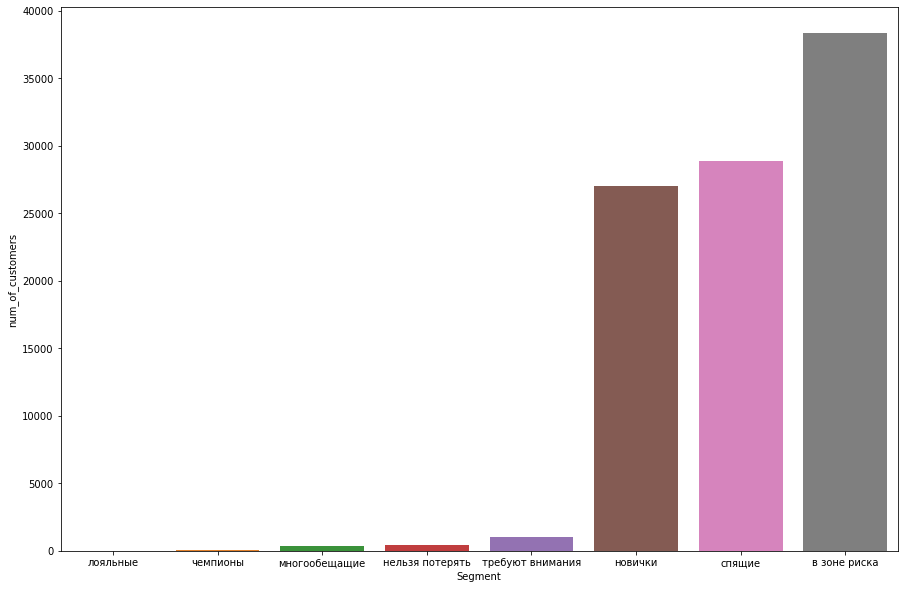

In [137]:
plt.figure(figsize = (15,10))
sns.barplot(x = segmentation['Segment'], y =segmentation['num_of_customers'])

## Ответ на 6 вопрос
Итак, получается, что распределение между группами неравномерное. Но я разделила именно так, а не равными частями, потому что есть сильный перекос в данных в ту или иную сторону. Например, подавляющее большинство клиентов делали заказ всего лишь один раз. Очень низкий средний чек в принципе.  

Получается, что в компании очень мало лояльных клиентов и чемпионов, их можно было бы даже объединить и таргетироваться на них как на одну группу. Сюда вошли те, кто покупает часто, недавно и на сумму больше средней.

В группу **"чемпионов"** вошли те, кто покупал недавно, меньше полугода назад и частота покупок **или** средний чек выше среднего.  

**"Лояльные"** - те, кто покупал недавно, меньше полугода назад, со средней или высокой частотой покупок, но чек невысокий.
Также мы видим небольшие группы "многообещающие", "требуют внимания" и "нельзя потерять". "Нельзя потерять" - это клиенты, которые покупали больше года назад, и скорее всего их уже потеряли, но они покупали часто и на суммы больше средней. По крайней мере, можно было бы провести опрос среди них, к какому конкуренту они ушли или почему перестали покупать в итоге.  

**"Требуют внимания"** - это клиенты с частотой покупок выше среднего и вне зависимости от чека, которые покупали больше полугода назад, но не больше года. Хорошо бы на них обратить внимание, отправить им какое-то предложение, чтобы они не переключились на конкурента, например, т.к. они потенциально могут стать лояльными.  

**"Многообещающие"** - это клиенты, которые тоже могут потенциально стать лояльными и чемпионами, им нужно повысить средний чек или частоту покупок.

Дальше у нас идут три самые большие группы.

**"Новички"** - у компании был приток новых клиентов, сюда вошли все с недавней первой покупкой вне зависимости от размера чека, их довольно много и их нужно зацепить, возможно, предложить вступить в клуб программы лояльности, чтобы был стимул снова делать покупки

**"Спящие"** - все, кто не делал покупки больше года с частотой **или** суммой покупки ниже среднего. Скорее всего, не стоит сейчас делать на них упор, лучше сосредоточиться на других группах

**"В зоне риска"** - самая большая группа, сюда вошли те, кто делал покупки больше полугода назад, но не больше года, и средний чек или частота покупок у них ниже среднего. Скорее всего, они тоже перейдут в "спящих". Тоже рекламный бюджет тратила бы на них в последнюю очередь